# MONTE CARLO SIMULATION

In [6]:
from random import random

rand1 = random()
rand2 = random()

#Formula idea (in excel)
#=IF1(A1- 0.52n 2 + 1B1- 0.52n 2 6 0.5n 2,4,02


0.05186557606690212 0.1357310711329598


In [8]:
# Estimating pi/4
# cos^2 + sin^2 = radius^2 = 1/4

result= (rand1 - 0.5)**2 + (rand2 - 0.5)**2

print(result)

0.3335163144517903


In [14]:
# Iterating process
n_iterations=1000000

def estimate_pi(n_iterations):
    count=0
    for i in range(n_iterations):
        rand1 = random()
        rand2 = random()
        result= (rand1 - 0.5)**2 + (rand2 - 0.5)**2
        if result < 0.25:
            count+=4
    return count/n_iterations

print(estimate_pi(n_iterations))

3.143068


In [17]:
#plotting the figure of progressively better estimates of pi with a circle and square
import matplotlib.pyplot as plt
import numpy as np



pi estimation: 3.1376


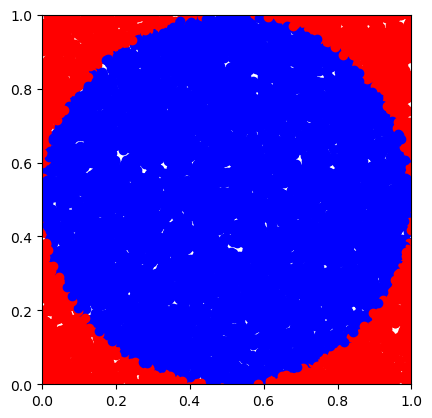

In [27]:
n_iterations=10000
def plot_pi(n_iterations):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.add_patch(plt.Circle((0.5, 0.5), 0.5, fill=False))
    x = np.linspace(0,1,100)
    y = np.sqrt(0.25 - (x - 0.5)**2) + 0.5
    ax.plot(x, y, 'r')
    ax.plot(x, 1-y, 'r')
    count=0
    for i in range(n_iterations):
        rand1 = random()
        rand2 = random()
        result= (rand1 - 0.5)**2 + (rand2 - 0.5)**2
        if result < 0.25:
            ax.plot(rand1, rand2, 'bo')
            count += 4
        else:
            ax.plot(rand1, rand2, 'ro')
    print('pi estimation:', count/n_iterations)
    plt.show()

plot_pi(n_iterations)